# Prototype


### First data proccesing into pandas or numpy 

In [30]:
import pandas as pd 
import numpy as np


In [29]:

df = pd.read_excel("annotations.xlsx",index_col=0 )
df.drop(df.columns.difference(["text","type"]), 1, inplace=True)
distrub = df['type'].value_counts(normalize=True)
one_hot = pd.get_dummies(df["type"])
df = df.drop("type",axis = 1)
df = df.join(one_hot)

print(df)



                                                    text  center  left  right
0      The transgender effort to suppress any recogni...       0     0      1
1      Radical Virginia Citizens Defense League has o...       0     1      0
2      Miller is the architect of President Donald Tr...       0     1      0
3      The House Democrats’ 1,400-page coronavirus re...       0     0      1
4      A specter is haunting the West; our elites see...       0     0      1
...                                                  ...     ...   ...    ...
22466  Oregon first graders could attend gun safety c...       1     0      0
22467  But President Donald Trump and his campaign ad...       0     1      0
22468  The normalization effort included softened rhe...       1     0      0
22469  And so, while demonstrations began to spread a...       0     1      0
22470  House and Senate Democrats are responding to t...       0     0      1

[17775 rows x 4 columns]


C:\Users\mrimb\AppData\Local\Temp/ipykernel_17464/174351494.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(["text","type"]), 1, inplace=True)


### Exploratory data analysis 

In [31]:
#numerical data anaylisis on the type
print("--Distrubtion of Poltical Bias--")
center = df['center'].value_counts() #we use post one-hot encoded dataset 
left = df['left'].value_counts()
right = df['right'].value_counts()
print("Percentage Distrubtuion")
print(distrub * 100) 

--Distrubtion of Poltical Bias--
Percentage Distrubtuion
left      40.753868
right     40.686357
center    18.559775
Name: type, dtype: float64


--WORD PER SENTENCE AVGS--
Left word count average:  33.95416896742132
Center word count average:  33.250552638850515
Right word count average:  32.545768805309734
Total word count avergae:  33.42632911392405


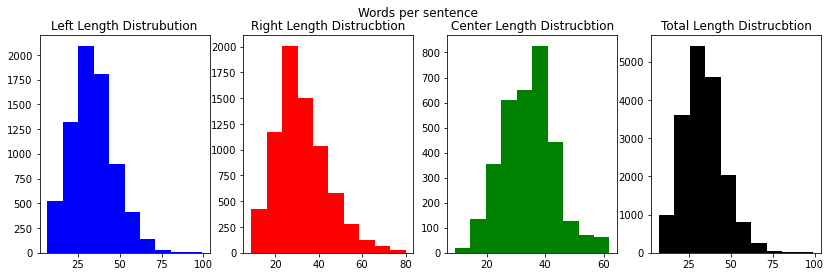

In [38]:
import matplotlib.pyplot as plt
#Text anaylsis on the body of the text 
print("--WORD PER SENTENCE AVGS--")
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print("Left word count average: ", df[df['left']==1]['word_count'].mean()) #left
print("Center word count average: ", df[df['center']==0]['word_count'].mean()) #center
print("Right word count average: ", df[df['right']==1]['word_count'].mean()) #right
print("Total word count avergae: ", df['word_count'].mean()) #Total
# print(df)

fig,(leftAx,RightAx,CenterAx,TotalAx)=plt.subplots(1,4,figsize=(14,4))
lefty=df[df['left']==1]['word_count']
leftAx.hist(lefty,color='blue')
leftAx.set_title('Left Length Distrubution')
righty=df[df['right']==1]['word_count']
RightAx.hist(righty,color='red')
RightAx.set_title('Right Length Distrucbtion')
centery=df[df['center']==1]['word_count']
CenterAx.hist(centery,color='green')
CenterAx.set_title('Center Length Distrucbtion')
totally=df['word_count']
TotalAx.hist(totally,color='black')
TotalAx.set_title('Total Length Distrucbtion')
fig.suptitle('Words per sentence')
plt.show()
